# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [2]:
pip install scikit-optimize 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 6.6 MB/s 


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
import lightgbm as ltb
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE

import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skopt.space import Real, Categorical, Integer

import matplotlib.pyplot as mp
import seaborn as sns

Import Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_of_health=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/project 2/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [6]:
#Make a copy of original data
df=df_of_health.copy()

In [7]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [8]:
#Knowing the shape of df
df.shape

(381109, 12)

In [9]:
#Knowing the columns of our df
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
#Knowing the description of df
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
#knowing the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [12]:
#Checking Nulls
# print(df.isnull().sum())
#OR
df.isnull().values.any()

False

As we can see there is no null value in our df so no need to go for null value treatment

Checking Duplicates

In [13]:
#checking Duplicates
# print(df.duplicated().sum())
#OR
df.duplicated().values.any()


False

As we can see there is no Duplicate value in our df so no need to go for Duplicates value treatment

Checking Outliers

In [14]:
df['Annual_Premium']=df.Annual_Premium.astype(int)

After checking all the features we've got only one column which have Outliers- 'Annual_Premium'

In [15]:
type(df['Annual_Premium'])

pandas.core.series.Series

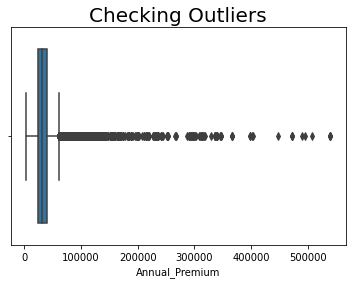

In [16]:
# for i in num_col.columns:
#   sns.boxplot(x=num_col[i])
sns.boxplot(x=df['Annual_Premium'])
mp.title('Checking Outliers', size=20)#title for the countplot
mp.show()

In [17]:
# Creating fuction for Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

In [18]:
#Find the column number
df.columns[8]

'Annual_Premium'

In [19]:
#Now go for Annual_Premium
for i in df.columns:
  if i == df.columns[8]:
    removeOutliers(df, i) 
# Assigning filtered data back to our original variable
df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)

IQR value for column Annual_Premium is: 14995.0
Shape of data after outlier removal is:  (370789, 12)


Checking and visualization of our target variable- Response

In [20]:
df.Response.value_counts()   #Response :	1:Customer is interested, 0:Customer is not interested

0    325634
1     45155
Name: Response, dtype: int64

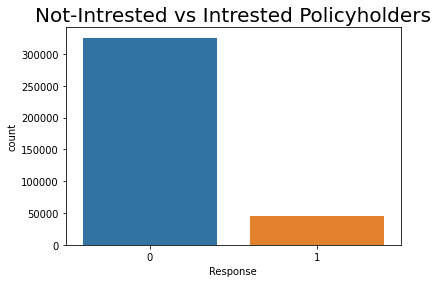

In [21]:
sns.countplot(x=df['Response'], data=df)
mp.title('Not-Intrested vs Intrested Policyholders', size=20)#title for the countplot
mp.show()

Observation-

As we can see that our data is unbalanced so we have to make it balanced data. But before that let's do some techniques and fetch some important information.

In [22]:
df.Response.skew()

2.3130462247234798

Our target column is Positively skewed

Text(0.5, 1.0, 'Target Feature')

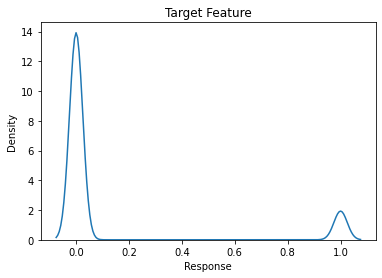

In [23]:
#checking the distribution of target variable
ax1=sns.kdeplot(df['Response'])
ax1.set_title('Target Feature')

As we can see our target feature has only two values- 0 and 1

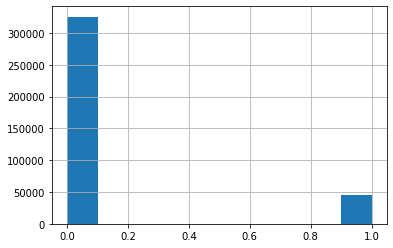

In [24]:
df['Response'].hist()

In [25]:
#Cecking other features
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [26]:
# Grouping the all numerical features under one umbrella for better visualization
num_col=df[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']]

In [27]:
#Checking our new df of numerical features
num_col

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,40454,26.0,217
1,76,3.0,33536,26.0,183
2,47,28.0,38294,26.0,27
3,21,11.0,28619,152.0,203
4,29,41.0,27496,152.0,39
...,...,...,...,...,...
381104,74,26.0,30170,26.0,88
381105,30,37.0,40016,152.0,131
381106,21,30.0,35118,160.0,161
381107,68,14.0,44617,124.0,74


In [28]:
# Grouping the all categorical features under one umbrella for better visualization
cat_col=[]
for i in df.columns:
  if i not in num_col:
    cat_col.append(i)


In [29]:
#Checking out categorical features
cat_col

['id',
 'Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response']

In [30]:
# Make df of our all categorical features and check it out(except id)
cat_col=df[cat_col]
cat_col

,id,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
0,1,Male,1,0,> 2 Years,Yes,1
1,2,Male,1,0,1-2 Year,No,0
2,3,Male,1,0,> 2 Years,Yes,1
3,4,Male,1,1,< 1 Year,No,0
4,5,Female,1,1,< 1 Year,No,0
...,...,...,...,...,...,...,...
381104,381105,Male,1,1,1-2 Year,No,0
381105,381106,Male,1,1,< 1 Year,No,0
381106,381107,Male,1,1,< 1 Year,No,0
381107,381108,Female,1,0,> 2 Years,Yes,0


In [31]:
#Dropping id feature because it is not making any sense
cat_col=cat_col.drop(['id'],axis=1)

In [32]:
# print categorical features
cat_col

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
0,Male,1,0,> 2 Years,Yes,1
1,Male,1,0,1-2 Year,No,0
2,Male,1,0,> 2 Years,Yes,1
3,Male,1,1,< 1 Year,No,0
4,Female,1,1,< 1 Year,No,0
...,...,...,...,...,...,...
381104,Male,1,1,1-2 Year,No,0
381105,Male,1,1,< 1 Year,No,0
381106,Male,1,1,< 1 Year,No,0
381107,Female,1,0,> 2 Years,Yes,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0baa5fa50>,
      dtype=object)

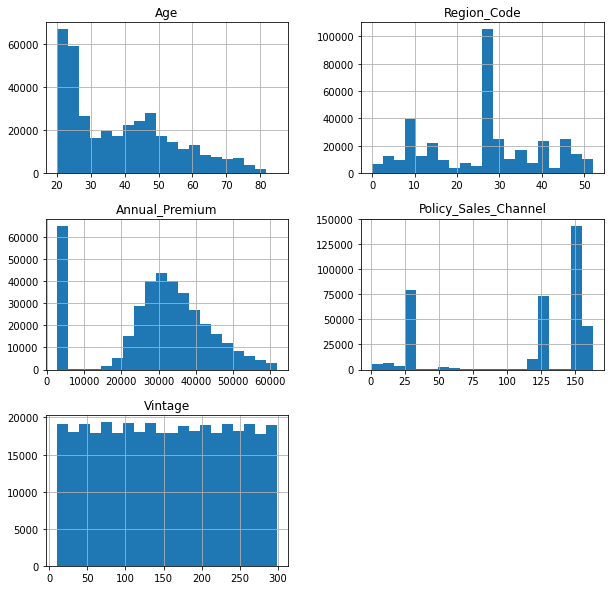

In [33]:
#Let's see the distribution of numerical columns
num_col.hist(figsize=(10,10),bins=20)

As we can see no feature are normally distributed in Numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0ba685490>,
      dtype=object)

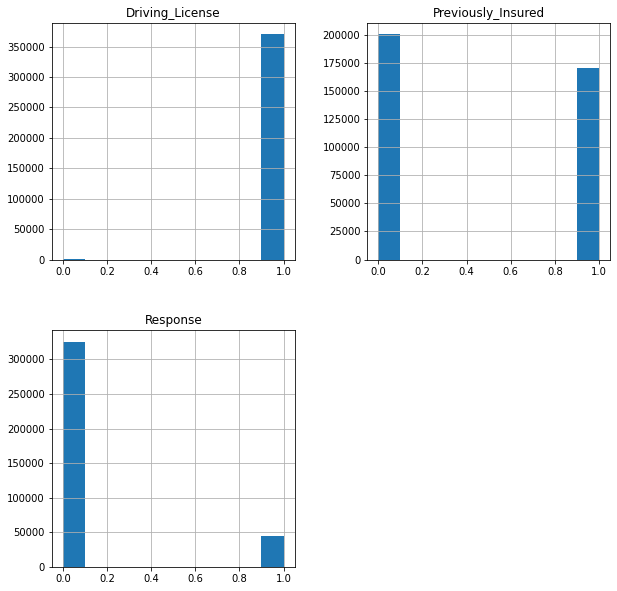

In [34]:
#Let's 
cat_col.hist(figsize=(10,10))

From the above histplot we can clearly see that nearly all the policyholder have driving license facility.

# Visualization

Let's visualize our features and find the relation between our target variable and other important features....

As we all know 1 means Customer is interested and 0 means Customer is not interested.

Text(0.5, 1.0, 'Response in terms of Gender')

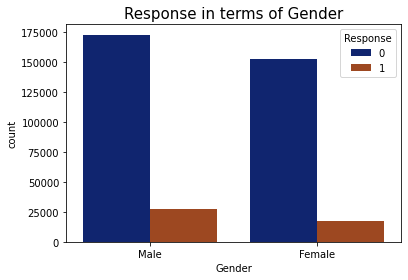

In [35]:
#count plot
ba=sns.countplot(x="Gender",hue ="Response",data=df,palette = "dark")
ba.set_title('Response in terms of Gender', fontsize=15)

As we can see from the above countplot female is less intrested than male for getting insurance for their vehicle.

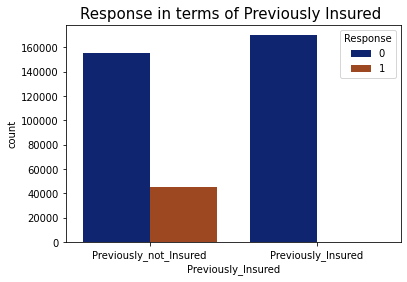

In [36]:
#In Previously_Insured 1 means Customer already has Vehicle Insurance and 0 means Customer doesn't have Vehicle Insurance yet
ba=sns.countplot(x="Previously_Insured",hue ="Response",data=df,palette = "dark")
ba.set_title('Response in terms of Previously Insured ', fontsize=15)
ticks = list(range(0, 2, 1)) 
labels = "Previously_not_Insured Previously_Insured".split()
mp.xticks(ticks, labels);

From the above count plot we can say that the customer who already secured their vehicle, are clearly not inrested in our company's vehicle insurance scheme.

Text(0.5, 1.0, 'Response in terms of Vehicle_Age ')

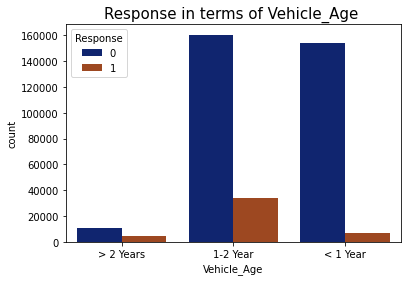

In [37]:
#count plot for Age of vehicle of policyholder
ba=sns.countplot(x="Vehicle_Age",hue ="Response",data=df,palette = "dark")
ba.set_title('Response in terms of Vehicle_Age ', fontsize=15)

From the above count-plot we can observe that the policyholders who has 1-2 year age's vehicle, are more intrested than other policyholders specially from those who have vehicle older than two years.

Text(0.5, 1.0, 'Response in terms of Vehicle_Damage ')

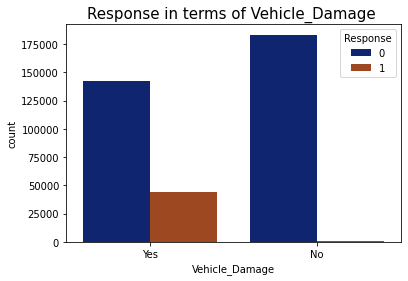

In [38]:
# In Vehicle_Damage 'Yes' means Customer got his/her vehicle damaged in the past and 'No' means Customer didn't get his/her vehicle damaged in the past.
ba=sns.countplot(x="Vehicle_Damage",hue ="Response",data=df,palette = "dark")    
ba.set_title('Response in terms of Vehicle_Damage ', fontsize=15)

We can observe that from above count-plot, policyholders whose vehicle damaged in past are more intrested than those whose vehicle not damaged in the past

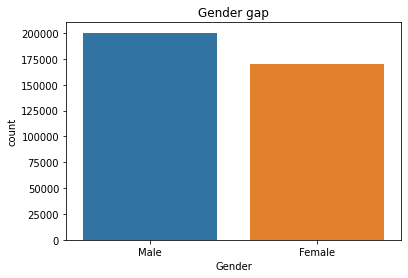

In [39]:
sns.countplot(x=df['Gender'], data=df)
mp.title('Gender gap')
mp.show()


We can see that we have some gender gap we can remove them by advertising marketing strategy.

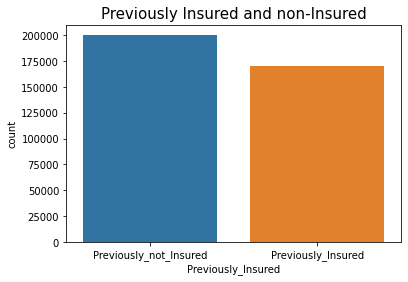

In [40]:
sns.countplot(x=df['Previously_Insured'], data=df)
mp.title('Previously Insured and non-Insured', fontsize=15)
ticks = list(range(0, 2, 1)) 
labels = "Previously_not_Insured Previously_Insured".split()
mp.xticks(ticks, labels);

From the above count-plot we can clearly see that we have more customers who doesn't have any insurance for their vehicle so we can easily target them.

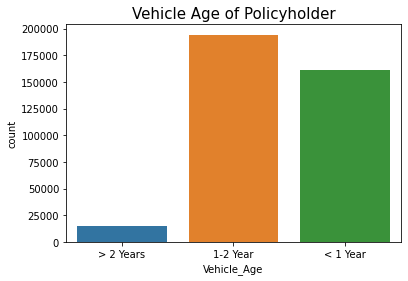

In [41]:
sns.countplot(x=df['Vehicle_Age'], data=df)
mp.title('Vehicle Age of Policyholder', fontsize=15)
mp.show()

From above count-plot we can say that we have less number of policyholders who has vehicle older than 2 years so we have to focus more on other two category.

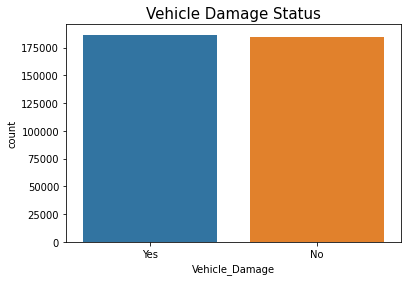

In [42]:
sns.countplot(x=df['Vehicle_Damage'], data=df)
mp.title('Vehicle Damage Status', fontsize=15)
mp.show()

After observation of above plot we can say that we have nearly equal policyholders for both vehicle damage status.

In [43]:
#Catplot
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001464,-0.000321,-0.000277,0.002768,0.002857,-0.002595,-0.000108,-0.001658
Age,0.001464,1.000000,-0.078650,0.042626,-0.253794,0.050669,-0.576846,-0.001644,0.110938
Driving_License,-0.000321,-0.078650,1.000000,-0.001195,0.014297,-0.010189,0.043390,-0.000514,0.009630
Region_Code,-0.000277,0.042626,-0.001195,1.000000,-0.023736,-0.002358,-0.043020,-0.002948,0.009474
Previously_Insured,0.002768,-0.253794,0.014297,-0.023736,1.000000,0.014252,0.217038,0.002886,-0.340913
Annual_Premium,0.002857,0.050669,-0.010189,-0.002358,0.014252,1.000000,-0.107074,-0.000884,0.018566
Policy_Sales_Channel,-0.002595,-0.576846,0.043390,-0.043020,0.217038,-0.107074,1.000000,0.000010,-0.136805
Vintage,-0.000108,-0.001644,-0.000514,-0.002948,0.002886,-0.000884,0.000010,1.000000,-0.001631
Response,-0.001658,0.110938,0.009630,0.009474,-0.340913,0.018566,-0.136805,-0.001631,1.000000


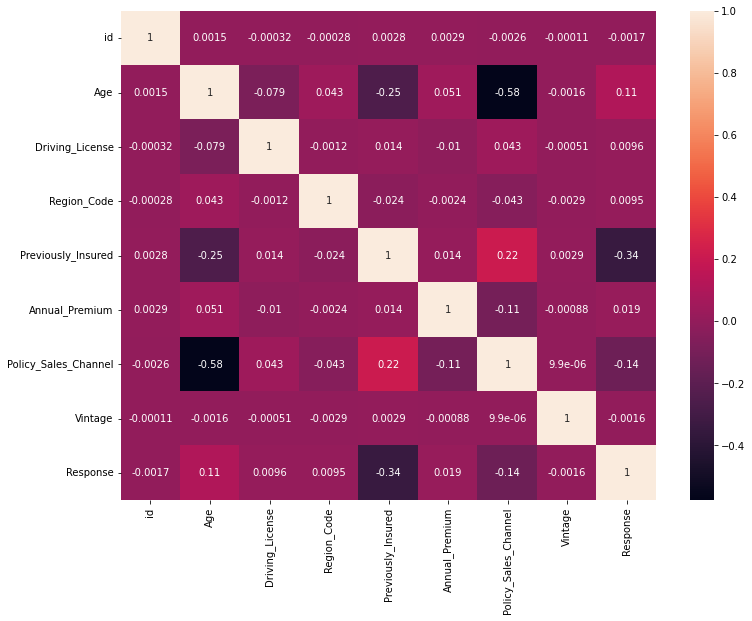

In [44]:
corr_df = df.corr()
mp.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot=True, xticklabels=corr_df.columns, yticklabels=corr_df.columns)

As we can observe that no features are highly correlated to our target feature instead of that policy-sales-channel are negativly correlated with Age.

Encoding

In [45]:
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1-2 Year,0,30170,26.0,88,0
381105,381106,1,30,1,37.0,1,< 1 Year,0,40016,152.0,131,0
381106,381107,1,21,1,30.0,1,< 1 Year,0,35118,160.0,161,0
381107,381108,0,68,1,14.0,0,> 2 Years,1,44617,124.0,74,0


In [48]:
df['Vehicle_Age'] = df['Vehicle_Age'].map( {'< 1 Year': 'Vehicle under 1 year', '1-2 Year': 'Vehicle under 1-2 year','> 2 Years':'Vehicle under more than 2 years'} )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df=pd.get_dummies(df) #drop_first=True

In [50]:
df.drop(['id'],axis=1, inplace=True)

In [51]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_Vehicle under 1 year,Vehicle_Age_Vehicle under 1-2 year,Vehicle_Age_Vehicle under more than 2 years
0,1,44,1,28.0,0,1,40454,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536,26.0,183,0,0,1,0
2,1,47,1,28.0,0,1,38294,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619,152.0,203,0,1,0,0
4,0,29,1,41.0,1,0,27496,152.0,39,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170,26.0,88,0,0,1,0
381105,1,30,1,37.0,1,0,40016,152.0,131,0,1,0,0
381106,1,21,1,30.0,1,0,35118,160.0,161,0,1,0,0
381107,0,68,1,14.0,0,1,44617,124.0,74,0,0,0,1


Try converting them to int64 and check

In [52]:
# for converting column type to int
df['Region_Code']=df['Region_Code'].astype(int)
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].astype(int)
df['Vehicle_Age_Vehicle under 1 year']=df['Vehicle_Age_Vehicle under 1 year'].astype(int)
df['Vehicle_Age_Vehicle under 1-2 year']=df['Vehicle_Age_Vehicle under 1-2 year'].astype(int)
df['Vehicle_Age_Vehicle under more than 2 years']=df['Vehicle_Age_Vehicle under more than 2 years'].astype(int)

In [53]:
#Checking dtype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                                       Non-Null Count   Dtype
---  ------                                       --------------   -----
 0   Gender                                       370789 non-null  int64
 1   Age                                          370789 non-null  int64
 2   Driving_License                              370789 non-null  int64
 3   Region_Code                                  370789 non-null  int64
 4   Previously_Insured                           370789 non-null  int64
 5   Vehicle_Damage                               370789 non-null  int64
 6   Annual_Premium                               370789 non-null  int64
 7   Policy_Sales_Channel                         370789 non-null  int64
 8   Vintage                                      370789 non-null  int64
 9   Response                                     370789 non-null  int64
 10  Vehicle_

In [55]:
#Defining X and y variable
X=df.drop(['Response'],axis=1)
y=df['Response']

Preparation for feeding data to ML models

In [56]:
# Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [57]:
print(X_train.shape)
print(y_train.shape)

(296631, 12)
(296631,)


In [58]:
print(X_test.shape)
print(y_test.shape)

(74158, 12)
(74158,)


Using SMOTE for balancing train data

In [59]:
# from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [64]:
y_train.value_counts()

0    260507
1    260507
Name: Response, dtype: int64

In [60]:
print(X_train.shape)
print(y_train.shape)

(521014, 12)
(521014,)


In [61]:
#make a list of column for getting feature importance at the end
train_col_list=list(X_train.columns)
train_col_list

['Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Vehicle_Age_Vehicle under 1 year',
 'Vehicle_Age_Vehicle under 1-2 year',
 'Vehicle_Age_Vehicle under more than 2 years']

Scaling

In [62]:
# #tried Standard Scaler also but MinMax Scaler Gives good result
ss = MinMaxScaler() 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

Trying Various Models

In [66]:
models = [
           ['LinearClassifier: ', Perceptron()],
           ['GNB: ', GaussianNB()],
           ['BNB: ', BernoulliNB()],
          #  ['SVC: ', SVC()],  # Because of taking too much time
           ['KNeighborsClassifier: ', KNeighborsClassifier()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['RandomForestClassifier ',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBClassifier: ', XGBClassifier(eval_metric='mlogloss')],
           ['AdaBoostClassifier: ',AdaBoostClassifier()],
           ['LgbmClassifier: ',ltb.LGBMClassifier()]
         ]

In [67]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_accuracy_score"] = accuracy_score(y_train,[round(value) for value in (curr_model.predict(X_train))])
    curr_model_data["Test_accuracy_score"] = accuracy_score(y_test,[round(value) for value in (curr_model.predict(X_test))])
    curr_model_data["Test_precision_score"]= precision_score(y_test,[round(value) for value in (curr_model.predict(X_test))])
    curr_model_data["Test_f1_score"]= f1_score(y_test,[round(value) for value in (curr_model.predict(X_test))])
    curr_model_data["Test_roc_auc_score"]= roc_auc_score(y_test,[round(value) for value in (curr_model.predict(X_test))])
    model_data.append(curr_model_data)

In [68]:
model_data

[{'Name': 'LinearClassifier: ',
  'Test_accuracy_score': 0.8197362388413927,
  'Test_f1_score': 0.363003907366816,
  'Test_precision_score': 0.31861145964031784,
  'Test_roc_auc_score': 0.6483453841726585,
  'Train_Time': 0.6746418476104736,
  'Train_accuracy_score': 0.7586264476578365},
 {'Name': 'GNB: ',
  'Test_accuracy_score': 0.7201380835513363,
  'Test_f1_score': 0.4247782705099778,
  'Test_precision_score': 0.2833006765499649,
  'Test_roc_auc_score': 0.7754285976516703,
  'Train_Time': 0.12692689895629883,
  'Train_accuracy_score': 0.8023757518991812},
 {'Name': 'BNB: ',
  'Test_accuracy_score': 0.7201380835513363,
  'Test_f1_score': 0.42008494467419244,
  'Test_precision_score': 0.28093582987629406,
  'Test_roc_auc_score': 0.7684662157932195,
  'Train_Time': 0.1859726905822754,
  'Train_accuracy_score': 0.8018709669989674},
 {'Name': 'KNeighborsClassifier: ',
  'Test_accuracy_score': 0.7769896707030934,
  'Test_f1_score': 0.381062874251497,
  'Test_precision_score': 0.287805981

In [69]:
# making Dataframe of resuls
result= pd.DataFrame(model_data)

In [70]:
#showing results
result

,Name,Train_Time,Train_accuracy_score,Test_accuracy_score,Test_precision_score,Test_f1_score,Test_roc_auc_score
0,LinearClassifier:,0.674642,0.758626,0.819736,0.318611,0.363004,0.648345
1,GNB:,0.126927,0.802376,0.720138,0.283301,0.424778,0.775429
2,BNB:,0.185973,0.801871,0.720138,0.280936,0.420085,0.768466
3,KNeighborsClassifier:,1.661267,0.900030,0.776990,0.287806,0.381063,0.685144
4,DecisionTreeClassifier:,3.135255,0.999720,0.793711,0.279812,0.342361,0.641778
5,RandomForestClassifier,82.833803,0.999714,0.807115,0.310365,0.376297,0.665289
6,GradientBoostingClassifier:,72.067684,0.838031,0.764449,0.304690,0.429709,0.749058
7,XGBClassifier:,31.295459,0.838536,0.761347,0.303336,0.430310,0.752204
8,AdaBoostClassifier:,18.983088,0.829394,0.752690,0.298777,0.429762,0.758101
9,LgbmClassifier:,6.652142,0.851401,0.786281,0.314142,0.420999,0.722432


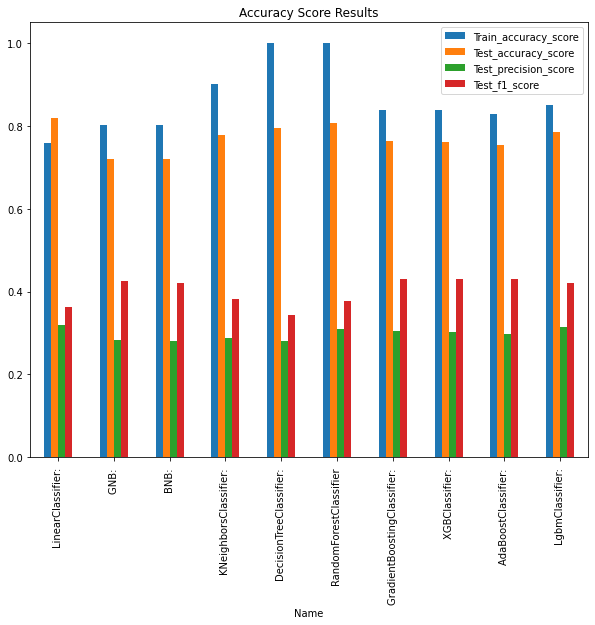

In [71]:
#Draw plot for above models metrices
result.plot(x="Name", y=['Train_accuracy_score' , 'Test_accuracy_score' , 'Test_precision_score', 'Test_f1_score'], kind="bar" , title = 'Accuracy Score Results' , figsize= (10,8)) 

As we can see that top 3 models for our Datasets is Random Forest Classifier, Decision Tree Classifier and LgbmClassifier.

Getting Confusion Matrix for Better Understanding

In [72]:
model_data2 = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["conf_mat"] = confusion_matrix(y_test,[round(value) for value in (curr_model.predict(X_test))])
    model_data2.append(curr_model_data)

In [73]:
model_data2

[{'Name': 'LinearClassifier: ',
  'Train_Time': 0.7286808490753174,
  'conf_mat': array([[56981,  8146],
         [ 5222,  3809]])},
 {'Name': 'GNB: ',
  'Train_Time': 0.1257030963897705,
  'conf_mat': array([[45741, 19386],
         [ 1368,  7663]])},
 {'Name': 'BNB: ',
  'Train_Time': 0.19488239288330078,
  'conf_mat': array([[45887, 19240],
         [ 1514,  7517]])},
 {'Name': 'KNeighborsClassifier: ',
  'Train_Time': 1.6759724617004395,
  'conf_mat': array([[52529, 12598],
         [ 3940,  5091]])},
 {'Name': 'DecisionTreeClassifier: ',
  'Train_Time': 3.146010160446167,
  'conf_mat': array([[54878, 10249],
         [ 5049,  3982]])},
 {'Name': 'RandomForestClassifier ',
  'Train_Time': 83.61073875427246,
  'conf_mat': array([[55539,  9588],
         [ 4716,  4315]])},
 {'Name': 'GradientBoostingClassifier: ',
  'Train_Time': 72.9104552268982,
  'conf_mat': array([[50109, 15018],
         [ 2450,  6581]])},
 {'Name': 'XGBClassifier: ',
  'Train_Time': 29.250967979431152,
  'conf_

In [74]:
Conf_Mat_df= pd.DataFrame(model_data2)

In [75]:
Conf_Mat_df

,Name,Train_Time,conf_mat
0,LinearClassifier:,0.728681,"[[56981, 8146], [5222, 3809]]"
1,GNB:,0.125703,"[[45741, 19386], [1368, 7663]]"
2,BNB:,0.194882,"[[45887, 19240], [1514, 7517]]"
3,KNeighborsClassifier:,1.675972,"[[52529, 12598], [3940, 5091]]"
4,DecisionTreeClassifier:,3.146010,"[[54878, 10249], [5049, 3982]]"
5,RandomForestClassifier,83.610739,"[[55539, 9588], [4716, 4315]]"
6,GradientBoostingClassifier:,72.910455,"[[50109, 15018], [2450, 6581]]"
7,XGBClassifier:,29.250968,"[[49776, 15351], [2347, 6684]]"
8,AdaBoostClassifier:,19.387687,"[[48907, 16220], [2120, 6911]]"
9,LgbmClassifier:,6.660163,"[[52547, 12580], [3269, 5762]]"


As we can see from above confusion matrix that Random Forest Classifier is doing great with our train and test dataset.

# Hyper parameter tuning 

We will only go for Random Forest Classifier and lgbm as these are giving good results in comparison to others above.

In [127]:
clas = RandomForestClassifier(random_state=40)
# Instantiate the bayes search model
bayes_search = BayesSearchCV(estimator=clas,
                       search_spaces = {
                          'max_depth': Integer(11,13),
                          'min_samples_leaf': Integer(1,2),
                          'min_samples_split': Integer(2,3),
                          'n_estimators': Integer(135,140),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=10)

bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=139; total time=  52.6s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=139; total time=  59.7s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=139; total time= 1.0min
[CV] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=139; total time=  55.9s
[CV] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=139; total time= 1.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=136; total time=  52.2s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=136; total time= 1.0min
[CV] END max_depth=11, max_features=log2, 

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
              n_iter=10, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=11, high=13, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=2, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=3, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=135, high=140, prior='uniform', transform='normalize')},
              verbose=2)

In [128]:
bayes_search.best_params_

OrderedDict([('max_depth', 12),
             ('max_features', 'log2'),
             ('min_samples_leaf', 1),
             ('min_samples_split', 3),
             ('n_estimators', 139)])

In [129]:
bayes_search.best_estimator_

RandomForestClassifier(max_depth=12, max_features='log2', min_samples_split=3,
                       n_estimators=139, random_state=40)

In [130]:
#make prediction
train_pred=bayes_search.best_estimator_.predict(X_train)
test_pred=bayes_search.best_estimator_.predict(X_test)

In [131]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8451346796823118
The accuracy on test dataset is 0.7648534210739233


In [132]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

In [133]:
train_cm

array([[201277,  59230],
       [ 21457, 239050]])

In [134]:
test_cm

array([[49997, 15130],
       [ 2308,  6723]])

In [135]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred))
print("\n")
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83    260507
           1       0.80      0.92      0.86    260507

    accuracy                           0.85    521014
   macro avg       0.85      0.85      0.84    521014
weighted avg       0.85      0.85      0.84    521014



              precision    recall  f1-score   support

           0       0.96      0.77      0.85     65127
           1       0.31      0.74      0.44      9031

    accuracy                           0.76     74158
   macro avg       0.63      0.76      0.64     74158
weighted avg       0.88      0.76      0.80     74158



Results of Hyperparameter clearly shows that we have to play a lot with these parameters for getting better accuracy

##**Roc and precison recall curve for Bayes train data.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


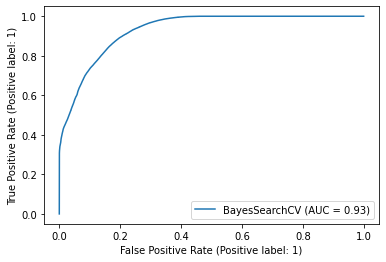

In [136]:
metrics.plot_roc_curve(bayes_search, X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


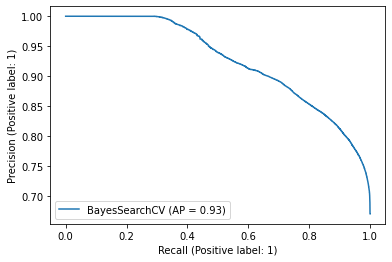

In [137]:
metrics.plot_precision_recall_curve(bayes_search, X_train, y_train)

##**Roc and precison recall curve for Bayes test data.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


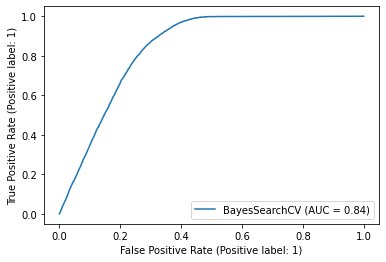

In [138]:
metrics.plot_roc_curve(bayes_search, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


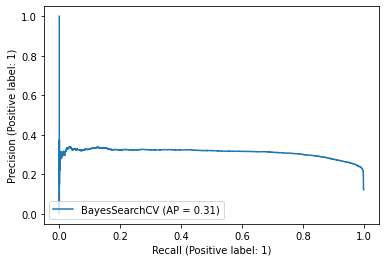

In [139]:
metrics.plot_precision_recall_curve(bayes_search, X_test, y_test)

After observing these curves we can make a important note:

# NOTE  : For Hyperparameter tuning

As we can see tuning didn't give us a good results so we have to play more with hyperparameter and see what happens. But this takes a lot of time for each-time so we will only include this results for now.

# VALIDATION

In [89]:
from sklearn.model_selection import cross_validate

In [90]:
rf_classifier=RandomForestClassifier(n_estimators=25, random_state=12)

In [91]:
scoring=['precision_macro','recall_macro']
rf_classifier_result_2 = cross_validate(rf_classifier, X_train, y_train,scoring=scoring, cv=5)
print(rf_classifier_result_2)

{'fit_time': array([18.08959174, 16.74918723, 17.00077915, 17.1039927 , 17.24564767]), 'score_time': array([0.91901946, 0.89606667, 1.06990433, 0.89131021, 0.8827467 ]), 'test_precision_macro': array([0.78445078, 0.89837939, 0.90005054, 0.89956515, 0.90019963]), 'test_recall_macro': array([0.77196333, 0.89304586, 0.894609  , 0.89389884, 0.89488685])}


In [92]:
rf_classifier.fit(X_train,y_train)
train_pred=rf_classifier.predict(X_train)
test_pred=rf_classifier.predict(X_test)



In [93]:
train_accu=accuracy_score(y_train,train_pred)
test_accu=accuracy_score(y_test,test_pred)

In [94]:
train_accu

0.9987255620770267

In [95]:
test_accu

0.8040535073761428

Feature Importance

In [145]:
importances = bayes_search.best_estimator_.feature_importances_
importance_dict = {'Feature' : train_col_list,
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [97]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [98]:
importance_df.head()

,Feature,Feature Importance
0,Gender,0.03
1,Age,0.10
2,Driving_License,0.00
3,Region_Code,0.04
4,Previously_Insured,0.30


In [99]:
#Our top feature in descending order
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
4,Previously_Insured,0.30
5,Vehicle_Damage,0.21
9,Vehicle_Age_Vehicle under 1 year,0.13
1,Age,0.10
7,Policy_Sales_Channel,0.07
10,Vehicle_Age_Vehicle under 1-2 year,0.05
3,Region_Code,0.04
0,Gender,0.03
11,Vehicle_Age_Vehicle under more than 2 years,0.03
6,Annual_Premium,0.02


# Tuning for Lgbm

In [140]:
clas = ltb.LGBMClassifier(random_state=40)
# Instantiate the bayes search model
bayes_search = BayesSearchCV(estimator=clas,
                       search_spaces = {
                          'max_depth': Integer(1,15),
                          'min_samples_leaf': Integer(1,10),
                          'min_samples_split': Integer(1,10),
                          'n_estimators': Integer(100,150),
                          'max_features': ["auto", "sqrt", "log2"]
                        },
                       cv = 5, verbose=2, scoring='accuracy',n_iter=10)

bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=11, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=109; total time=   6.5s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=109; total time=   6.3s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=109; total time=   8.9s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=109; total time=   7.8s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=9, min_samples_split=2, n_estimators=109; total time=   6.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=116; total time=   6.8s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=116; total time=   6.6s
[CV] END max_depth=8, max_features=log2, min

BayesSearchCV(cv=5, estimator=LGBMClassifier(random_state=40), n_iter=10,
              scoring='accuracy',
              search_spaces={'max_depth': Integer(low=1, high=15, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=150, prior='uniform', transform='normalize')},
              verbose=2)

In [141]:
bayes_search.best_params_

OrderedDict([('max_depth', 7),
             ('max_features', 'log2'),
             ('min_samples_leaf', 2),
             ('min_samples_split', 3),
             ('n_estimators', 113)])

In [142]:
bayes_search.best_estimator_

LGBMClassifier(max_depth=7, max_features='log2', min_samples_leaf=2,
               min_samples_split=3, n_estimators=113, random_state=40)

In [143]:
#make prediction
train_pred=bayes_search.best_estimator_.predict(X_train)
test_pred=bayes_search.best_estimator_.predict(X_test)

In [144]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8508792470067983
The accuracy on test dataset is 0.783381428841123


In [146]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

In [147]:
train_cm

array([[209562,  50945],
       [ 26749, 233758]])

In [148]:
test_cm

array([[52237, 12890],
       [ 3174,  5857]])

In [149]:
print(classification_report(y_train,train_pred))
print("\n")
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84    260507
           1       0.82      0.90      0.86    260507

    accuracy                           0.85    521014
   macro avg       0.85      0.85      0.85    521014
weighted avg       0.85      0.85      0.85    521014



              precision    recall  f1-score   support

           0       0.94      0.80      0.87     65127
           1       0.31      0.65      0.42      9031

    accuracy                           0.78     74158
   macro avg       0.63      0.73      0.64     74158
weighted avg       0.87      0.78      0.81     74158



## Roc and precison recall curve for Bayes train data.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


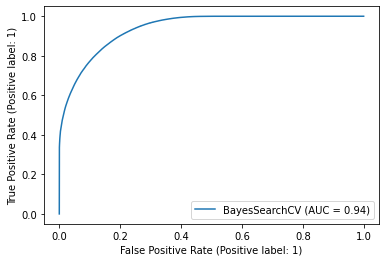

In [150]:
metrics.plot_roc_curve(bayes_search, X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


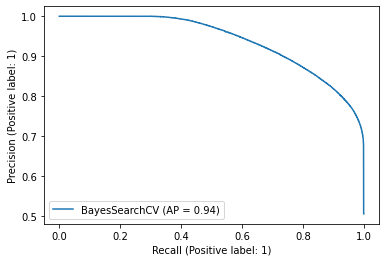

In [151]:
metrics.plot_precision_recall_curve(bayes_search, X_train, y_train)

## Roc and precison recall curve for Bayes test data.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


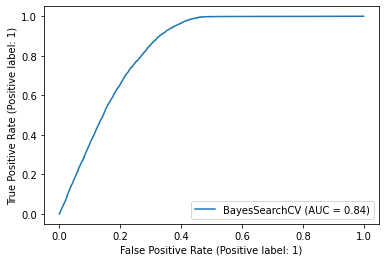

In [152]:
metrics.plot_roc_curve(bayes_search, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


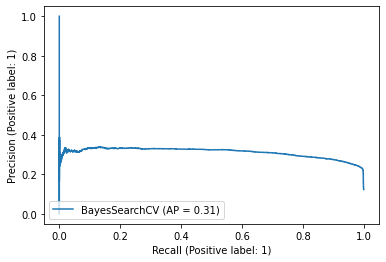

In [153]:
metrics.plot_precision_recall_curve(bayes_search, X_test, y_test)

This lgbm tuning doesn't give good results than Rf classifier tuning.

# Conclusion:

Alas! We have reached the end of our notebook.

Starting with loading the data so far we have done EDA , null values treatment, dropping unnecessory columns, outliers handling, visualization, knowing the distribution, feature engineering,Applying some sampling technique(US, OS and SMOTE), model making, finalizing our best model and then we do some hyperparameter tuning also.

The Random Forest Classifier was the best model when compared with rest all models for this data set. For all the models This Classifier worked the best because it prevents the data from overfitting and plus it predicted very well based on all the features which is important.

**It gives 0.85 recall on train and around 0.76 recall on test data which can be good enough.**

##Key points:


1. we have some gender gap that female is less intrested than male for getting insurance for their vehicle.
2. the customer who already secured their vehicle, are clearly not inrested in our company's vehicle insurance scheme.
3. we can observe that the policyholders who has 1-2 year age's vehicle, are more intrested than other policyholders specially from those who have vehicle older than two years.
4. Policyholders whose vehicle damaged in past are more intrested than those whose vehicles are not damaged in the past.

##Improvements:

1. we can remove this gender gap by advertising marketing strategy.
2. we can clearly see that we have more customers who doesn't have any insurance for their vehicle so we can easily target them by directly for our campaign.
3. we can say that we have less number of policyholders who has vehicle older than 2 years so we have to focus more on other two category (1-2 years and >1 year). 

 But as we all know vehicle insurance for 1st year are mostly provided by sales agency itself so we have to target these sales agency also and we can gives best incentives to agency for break-down competition in the market.

4. As we saw that we have nearly equal policyholders for both vehicle damage status. so we can target those policyholders whose vehicles are damaged in past.




# Future Work
We can do some more Hyperparameter tuning as it's accurcy can be improve further and we can do this tuning for the other top models also

That's all..!!